## Debug Python 3 Porting issues in SalishSeaTools Package

### `nowcast.figures.plot_map()` PNW Coastline Polygon Plotting Issue

Reported by Jie on 2015-10-13

In [10]:
from importlib import reload

import netCDF4 as nc
import matplotlib.pyplot as plt
import scipy.io as sio

from salishsea_tools.nowcast import figures

%matplotlib inline

In [11]:
bathy = nc.Dataset('../../NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
PNW_coastline = sio.loadmat('../../map_data/PNW_coastline.mat')

In [12]:
reload(figures)

<module 'salishsea_tools.nowcast.figures' from '/home/doug/Documents/MEOPAR/tools/SalishSeaTools/salishsea_tools/nowcast/figures.py'>

/home/doug/miniconda3/envs/SalishSeaTools/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


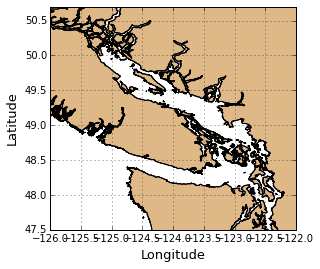

In [14]:
fig, ax = plt.subplots()
figures.plot_map(ax, bathy, PNW_coastline, coastline='full')

The problem in `plot_map()` was that the `zip()` builtin function in Python 3 returns an iterator object,
in contrast to the list that was returned by `zip()` in Python 2.
The `matplotlib.patches.Polygon` object constructor expects a list of polygon x-y pairs,
not an iterator.
So, the iterator returned by `zip()` is now explicitly transformed into a list.
See changeset [b91036b579d8](https://bitbucket.org/salishsea/tools/commits/b91036b579d8).

### stormtools.get_EC_observations() str vs. bytes Issue

Reported 2015-10-13 by Jie

In [2]:
from salishsea_tools import stormtools

In [8]:
%pdb

Automatic pdb calling has been turned OFF


In [6]:
reload(stormtools)

<module 'salishsea_tools.stormtools' from '/home/doug/Documents/MEOPAR/tools/SalishSeaTools/salishsea_tools/stormtools.py'>

In [7]:
stormtools.get_EC_observations('YVR', '01-Sep-2015', '30-Sep-2015')

(array([  7.22222222,   7.77777778,   6.11111111,   4.44444444,
          2.5       ,   4.44444444,   2.77777778,   1.66666667,
          2.22222222,   1.94444444,   2.5       ,   4.44444444,
          2.77777778,   6.94444444,   7.22222222,   6.11111111,
          5.        ,   4.16666667,   5.83333333,   4.44444444,
          4.16666667,   3.61111111,   4.16666667,   6.11111111,
          5.83333333,   5.27777778,   3.88888889,   3.61111111,
          0.83333333,   3.33333333,   3.61111111,   4.16666667,
          4.16666667,   4.16666667,   4.16666667,   4.16666667,
          8.05555556,   5.        ,   5.83333333,   5.27777778,
          6.38888889,   6.11111111,   5.83333333,   6.38888889,
          5.        ,   4.44444444,   4.72222222,   4.72222222,
          4.16666667,   4.72222222,   3.33333333,   3.88888889,
          2.5       ,   4.72222222,   4.44444444,   2.22222222,
          2.77777778,   3.61111111,   3.88888889,   2.5       ,
          3.88888889,   5.        ,   3.

The problem in `get_EC_observations()` was a `str` vs. `bytes` issue.
The `response.content` attribute (`bytes`) was being used instead of the `response.text` attribute (`str`).